In [ ]:
# Classify the email using the binary classification method. Email Spam detection has two
# states: 
# a) Normal State – Not Spam 
# b) Abnormal State – Spam 
# Use K-Nearest Neighbors and
# Support Vector Machine for classification. 
# Analyze their performance.
# Dataset link: The emails.csv dataset on the Kaggle
# https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score, recall_score

In [29]:
df = pd.read_csv("./emails.csv")

In [30]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [32]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [33]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [34]:
df = df.drop("Email No.", axis = 1)

In [35]:
df.dtypes

the           int64
to            int64
ect           int64
and           int64
for           int64
              ...  
military      int64
allowing      int64
ff            int64
dry           int64
Prediction    int64
Length: 3001, dtype: object

In [36]:
df["Prediction"].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [37]:
x = df.drop("Prediction", axis = 1)
y = df["Prediction"]

In [38]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [68]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
neigh = KNeighborsClassifier(n_neighbors = 2)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [71]:
y_pred = neigh.predict(x_test)

In [72]:
print("Train score:", neigh.score(x_train, y_train))
print("Test score:", neigh.score(x_test, y_test))

Train score: 0.9697848682620256
Test score: 0.9014492753623189


In [73]:
print("Confusion Metrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Metrix: 


array([[669,  55],
       [ 47, 264]])

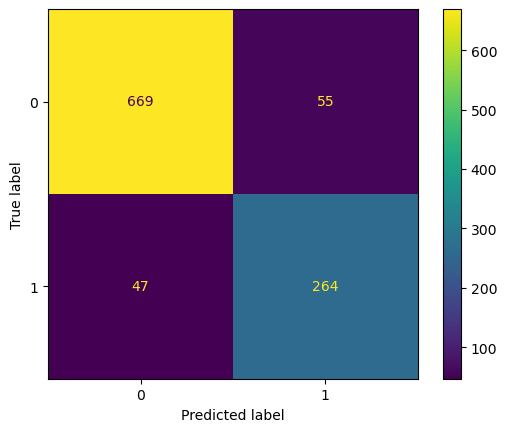

In [74]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       724
           1       0.83      0.85      0.84       311

    accuracy                           0.90      1035
   macro avg       0.88      0.89      0.88      1035
weighted avg       0.90      0.90      0.90      1035



In [76]:
print("Accuracy Score: ")
accuracy_score(y_test, y_pred)

Accuracy Score: 


0.9014492753623189

In [77]:
print("Precision Score: ")
precision_score(y_test, y_pred)

Precision Score: 


0.8275862068965517

In [78]:
print("Recall Score: ")
recall_score(y_test, y_pred)

Recall Score: 


0.8488745980707395

In [79]:
print("Error: ")
1 - accuracy_score(y_test, y_pred)

Error: 


0.09855072463768111

In [80]:
from sklearn.svm import SVC
SVM = SVC(gamma = "auto")
SVM.fit(x_train, y_train)

SVC(gamma='auto')

In [81]:
print("SVM Train Score:",SVM.score(x_train, y_train))
print("SVM Train Score:",SVM.score(x_test, y_test))

SVM Train Score: 0.969301426154218
SVM Train Score: 0.9323671497584541


In [82]:
y_pred = SVM.predict(x_test)

In [83]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix:


array([[719,   5],
       [ 65, 246]])

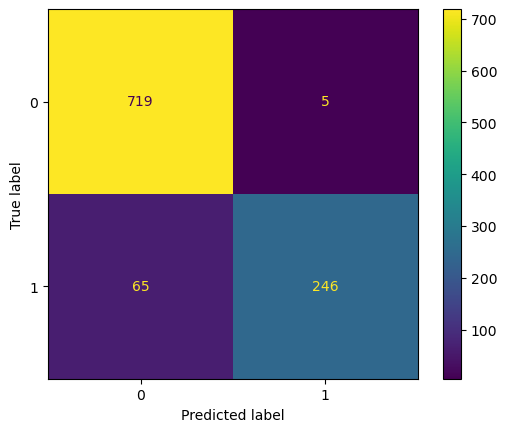

In [84]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       724
           1       0.98      0.79      0.88       311

    accuracy                           0.93      1035
   macro avg       0.95      0.89      0.91      1035
weighted avg       0.94      0.93      0.93      1035

